### Steps Including to implement Linear Regression

1. Collecting Data
2. Analyzing Data
3. Data Wrangling
4. Train and Test Dataset
5. Accuracy

Team Avenger

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
temp = pd.read_csv('CustomerData.csv - CustomerData.csv (1).csv')
temp.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [4]:
df=temp.copy()

In [5]:
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [6]:
df.shape

(3209, 14)

In [7]:
len(df.index)

3209

In [8]:
print('to print number of coulmns:',df.shape[1])
print('------------')
col=df.columns
print('to print number of columns:',len(col))


to print number of coulmns: 14
------------
to print number of columns: 14


Team Avenger

Missing values

In [9]:
df.isnull()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3205,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3206,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3207,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

CustomerID                      0
City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    3209 non-null   int64  
 1   City                          3209 non-null   int64  
 2   NoOfChildren                  3209 non-null   int64  
 3   MinAgeOfChild                 3209 non-null   int64  
 4   MaxAgeOfChild                 3209 non-null   int64  
 5   Tenure                        3209 non-null   int64  
 6   FrquncyOfPurchase             3209 non-null   int64  
 7   NoOfUnitsPurchased            3209 non-null   int64  
 8   FrequencyOFPlay               3209 non-null   int64  
 9   NoOfGamesPlayed               3209 non-null   int64  
 10  NoOfGamesBought               3209 non-null   int64  
 11  FavoriteChannelOfTransaction  3209 non-null   object 
 12  FavoriteGame                  3209 non-null   object 
 13  Tot

## Operation on categorical variables

Creating dummy variables for categorical variables

In [12]:
city=pd.get_dummies(df['City'],drop_first=True)
city.head()


,2
0,0
1,0
2,0
3,0
4,0


In [13]:
df.shape

(3209, 14)

In [14]:
Transaction=pd.get_dummies(df['FavoriteChannelOfTransaction'],drop_first=True)
Transaction.head()


,Uniform
0,1
1,0
2,0
3,0
4,1


In [15]:
df.shape

(3209, 14)

In [16]:
Game=pd.get_dummies(df['FavoriteGame'],drop_first=True)
Game.head()

,NONE,Uniform
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
df.shape

(3209, 14)

In [18]:
df = pd.concat([df,city,Transaction,Game],axis=1)

In [19]:
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated,2,Uniform,NONE,Uniform
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51,0,1,0,1
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40,0,0,0,1
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01,0,0,0,1
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00,0,0,0,1
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05,0,1,0,1


In [20]:
df.shape

(3209, 18)

In [21]:
df.drop(['CustomerID','City','FavoriteChannelOfTransaction','FavoriteGame'],axis=1,inplace=True)

In [22]:
df.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,2,Uniform,NONE,Uniform
0,2,3,8,210,11,11,2344,108,10,107.51,0,1,0,1
1,2,3,6,442,20,20,245,22,7,382.40,0,0,0,1
2,4,3,5,424,18,18,1059,130,18,135.01,0,0,0,1
3,1,6,6,261,11,9,365,34,11,125.00,0,0,0,1
4,3,6,9,422,44,31,1066,102,44,335.05,0,1,0,1


In [23]:
df.shape

(3209, 14)

Team Avenger

Train and Test Data

### Train Data

In [24]:
X=df.drop("TotalRevenueGenerated",axis=1)
y=df["TotalRevenueGenerated"]

In [25]:
X

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,2,Uniform,NONE,Uniform
0,2,3,8,210,11,11,2344,108,10,0,1,0,1
1,2,3,6,442,20,20,245,22,7,0,0,0,1
2,4,3,5,424,18,18,1059,130,18,0,0,0,1
3,1,6,6,261,11,9,365,34,11,0,0,0,1
4,3,6,9,422,44,31,1066,102,44,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,2,4,6,365,16,16,827,78,16,0,0,0,1
3205,2,2,5,348,20,20,2933,294,13,0,0,0,1
3206,2,5,7,341,16,13,1250,126,16,0,1,0,1
3207,2,6,7,368,18,14,1364,122,18,0,0,0,1


In [26]:
y

0       107.51
1       382.40
2       135.01
3       125.00
4       335.05
         ...  
3204    132.50
3205    223.23
3206    120.00
3207    161.50
3208    137.50
Name: TotalRevenueGenerated, Length: 3209, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [29]:
X_train

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,2,Uniform,NONE,Uniform
748,1,9,9,309,10,10,1123,57,10,0,0,0,1
244,2,4,5,357,10,10,1393,46,10,1,0,0,1
940,2,4,6,204,12,12,1014,10,12,0,0,0,0
609,1,5,5,147,13,13,90,31,10,0,0,0,1
3067,2,3,4,414,25,15,3403,99,24,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,5,7,438,21,21,2540,152,21,0,0,0,1
835,1,5,5,454,12,12,2104,195,9,0,0,0,1
1653,2,4,6,267,36,36,1387,171,27,0,0,0,1
2607,3,4,7,377,14,14,652,42,14,0,1,0,1


In [30]:
X_test

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,2,Uniform,NONE,Uniform
1087,3,1,4,418,19,19,1135,62,9,0,1,0,1
668,4,7,12,329,10,8,474,37,10,0,1,0,1
1504,1,8,8,381,8,8,495,52,8,0,0,0,1
496,3,6,10,112,18,15,378,54,18,0,1,0,1
2686,2,4,6,398,8,8,815,51,8,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1,4,4,453,11,11,1588,38,11,0,0,0,1
487,2,3,7,425,14,10,1029,23,10,0,0,0,0
1694,2,5,8,410,32,29,4162,266,32,0,0,0,1
2132,2,4,6,391,17,17,7536,194,16,0,0,0,1


In [31]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)


accuracy = ml.score(X_test,y_test)

In [32]:
accuracy

0.637918592450363

In [27]:
y_pred=ml.predict(X_test)
print(y_pred)

[284.89116857  86.73968194  95.63343504 145.76855303  95.48643662
 122.84993232 135.98832358 273.85894436 187.75428036 216.63830615
 109.33465832 224.15596039 120.67113102 228.92083812 135.47706359
 147.7572431  256.16702218 165.19151115 246.54878965 145.30722455
 150.27694242 115.61575772 210.78569117 199.07524522 153.90919962
 116.54109768 124.31651816 120.81815436 146.3172492  202.42604074
 138.735447   190.791516   189.03763101 137.64652267 154.056661
 124.81759055 286.12604922 136.19925548 134.98182697 133.18638568
 120.82366714 157.95048619 215.38933117 292.99723494 151.24802526
 151.05407616 161.73971507 173.03014486 135.01902136 135.08782176
 175.73708827 131.41386726 162.82188196 126.73901308 161.569548
 226.84884189 131.36480738 172.00689063 234.07635777 201.4275495
 170.3369585  109.76361204 170.05800191 153.8470659  109.09086346
 179.78224061  86.25972456 158.02958988 246.49435599 296.97029765
 162.78160206 132.54995276 153.68167798 174.43075688 184.49871302
 217.44711204 1

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('r2=',r2)
print('mae=',mae)


r2 0.637918592450363
mae 31.9409874527132


Evaluate The Model

In [33]:

from statsmodels.api import OLS
model1 = OLS(y_train,X_train.astype(float)).fit()
results1=model1.summary(alpha=0.05)
print(results1)

                                  OLS Regression Results                                  
Dep. Variable:     TotalRevenueGenerated   R-squared (uncentered):                   0.947
Model:                               OLS   Adj. R-squared (uncentered):              0.946
Method:                    Least Squares   F-statistic:                              3056.
Date:                   Mon, 09 Aug 2021   Prob (F-statistic):                        0.00
Time:                           23:26:59   Log-Likelihood:                         -11667.
No. Observations:                   2246   AIC:                                  2.336e+04
Df Residuals:                       2233   BIC:                                  2.343e+04
Df Model:                             13                                                  
Covariance Type:               nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

R2_score 94% and adjustedR2_score 94% is near 100% by this we can say our model is good model

Plot the results

Text(0.5, 1.0, 'Actaul v/s Predicted')

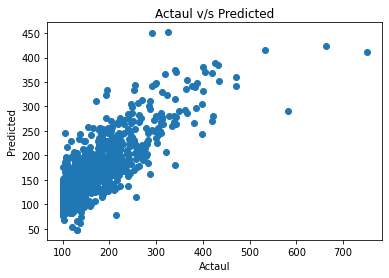

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

plt.xlabel('Actaul')
plt.ylabel('Predicted')
plt.title('Actaul v/s Predicted')
